In [94]:
# import package

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model, Input, Model
import json
from matplotlib import pyplot as plt

print("Tensorflow version : " + tf.__version__)


Tensorflow version : 2.2.0


In [95]:
# data preprocessing - training set

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode=('binary')
)


Found 8000 images belonging to 2 classes.


In [96]:
# data preprocessing - testing set

test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode=('binary')
)


Found 2000 images belonging to 2 classes.


In [97]:
# define Sequential model

def model():

    cnn = tf.keras.models.Sequential()

    # Convolutional Layers
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    # Flattening
    cnn.add(tf.keras.layers.Flatten())

    # Full Connection
    cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

    # Output
    cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile
    cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return cnn


In [98]:
# Load model

cnn = model()
# cnn.load_weights("model-checkpoint/catdog-simple-001.hdf5")
print(cnn.summary())

# checkpoint
CHECKPOINT_PATH = "model-checkpoint/catdog-simple-{epoch:03d}.hdf5"
checkpoint = ModelCheckpoint(CHECKPOINT_PATH, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit model
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 100, callbacks=callbacks_list)

# save h5 model
cnn.save("catdog-simple.h5")
print("Saved h5 model to disk")


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_27 (Dense)             (None, 1)               

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Training Data Saved.


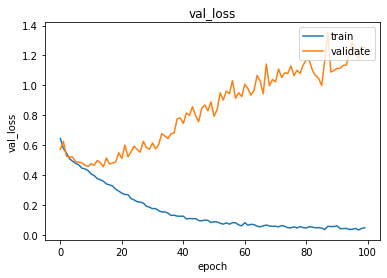

Training Fig Saved.


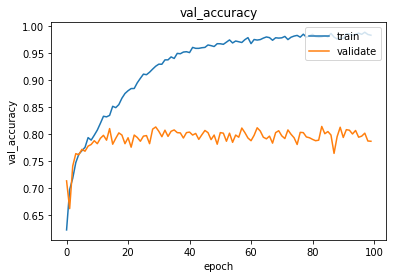

Training Fig Saved.


In [99]:
# Visualization

# training visualization
training_data = history.history
print(training_data.keys())

# text file
f = open('Diagram/training.txt', 'w')
f.write(str(training_data))
f.close()

# json file
f = open('Diagram/training.json', 'w')
training_data = str(training_data)
f.write(str(training_data.replace("\'", "\"")))
f.close()

print("Training Data Saved.")

# summarize history for val_loss
fig = plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
    
# save fig and show
plt.savefig('Diagram/cnn_loss.png', dpi=120)
plt.show()
print("Training Fig Saved.")

# summarize history for accuracy
fig = plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('val_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
    
# save fig and show
plt.savefig('Diagram/cnn_accuracy.png', dpi=120)
plt.show()
print("Training Fig Saved.")


In [100]:
# make single prediction

import numpy as np
from keras.preprocessing import image

# load weight
cnn.load_weights("catdog-simple.h5")

# load image
test_image = image.load_img('single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# predict image
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] > 0.5:
    prediction = 'dog'

else:
    prediction = 'cat'

print(prediction)


dog
